In [1]:
#import pandas
import pandas as pd
X_train = pd.read_csv("train/X_train.csv")
X_test = pd.read_csv("test/X_test.csv")
y_train = pd.read_csv("train/y_train.csv")
y_test = pd.read_csv("test/y_test.csv")

In [2]:
#------------------ Random Forest CLASSIFIER ----------------------------

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    grid_params,
    verbose = 1,
    cv = 5,
    n_jobs = -1
)

gs_results = gs.fit(X_train, y_train.values.ravel())
print('best score: ' + str(gs_results.best_score_))
print('best estimator: ' + str(gs_results.best_estimator_))
print('best params: ' + str(gs_results.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   30.7s finished


best score: 0.9859154929577464
best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
best params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


accuracy: 0.9867549668874173
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.95      0.98        43

    accuracy                           0.99       151
   macro avg       0.99      0.98      0.98       151
weighted avg       0.99      0.99      0.99       151

Confusion matrix, without normalization
[[108   0]
 [  2  41]]
Normalized confusion matrix
[[1.         0.        ]
 [0.04651163 0.95348837]]


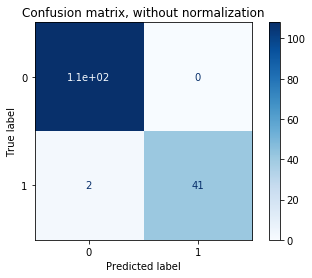

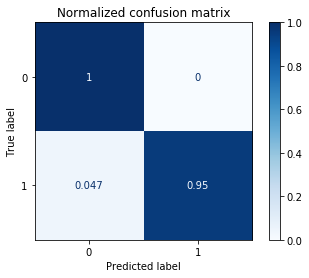

In [4]:
import numpy as np

rfc = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500,  criterion='entropy')

rfc.fit(X_train, y_train.values.ravel())

y_pred = rfc.predict(X_test)

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

class_names = [0,1]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()